In [2]:
import pandas as pd
from pathlib import Path

In [3]:
pillar_spliceAI_snv_file = Path("/data/dzeiberg/pillar_project/dataframe/pillar_data_clinvar38_annotated_final_v13_expanded_031425_X_SpliceAI_SNV.vcf.gz")
pillar_project_csv = Path("/data/dzeiberg/pillar_project/dataframe/pillar_data_clinvar38_annotated_final_v13_expanded_031425.csv")

In [6]:
spliceAI_snv = pd.read_csv(pillar_spliceAI_snv_file, sep="\t", comment="#", header=None)
spliceAI_snv.columns = ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"]
def parse_spliceAI(info_value):
    """
    Parse the SpliceAI value from the INFO column and return a dictionary.
    """
    if "SpliceAI=" in info_value:
        spliceAI_data = info_value.split("SpliceAI=")[1]
        fields = spliceAI_data.split("|")
        return {
            "Allele": fields[0],
            "Gene": fields[1],
            "DS_AG": float(fields[2]),
            "DS_AL": float(fields[3]),
            "DS_DG": float(fields[4]),
            "DS_DL": float(fields[5]),
            "DP_AG": int(fields[6]),
            "DP_AL": int(fields[7]),
            "DP_DG": int(fields[8]),
            "DP_DL": int(fields[9])
        }
    return {}

# Apply the parse_spliceAI function and expand the resulting dictionary into separate columns
parsed_columns = spliceAI_snv["INFO"].apply(parse_spliceAI).apply(pd.Series)

# Add the parsed columns to the spliceAI_snv dataframe
spliceAI_snv = pd.concat([spliceAI_snv, parsed_columns], axis=1)

/tmp/ipykernel_3285825/3792632640.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  spliceAI_snv = pd.read_csv(pillar_spliceAI_snv_file, sep="\t", comment="#", header=None)


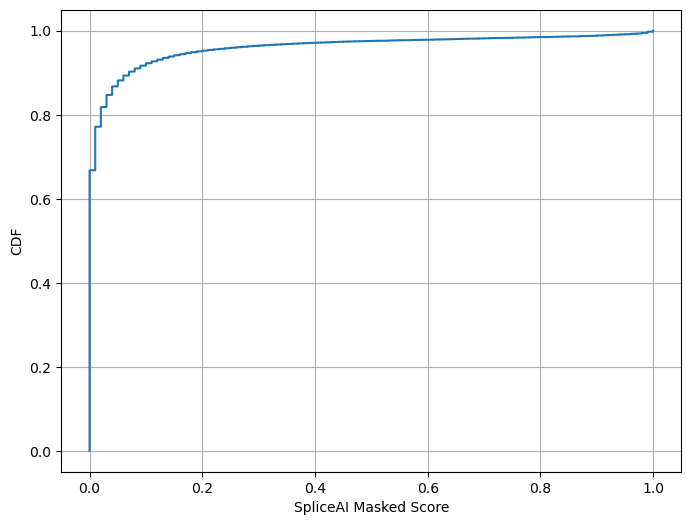

In [19]:
import numpy as np

import matplotlib.pyplot as plt

# Extract the values
values = spliceAI_snv.loc[:, ['DS_AG', 'DS_AL', 'DS_DG', 'DS_DL']].max(axis=1)

# Calculate the ECDF
x = np.sort(values)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.plot(x,y)
plt.xlabel("SpliceAI Masked Score")
plt.ylabel("CDF")
# plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid()
plt.show()